In [2]:
import nltk
nltk.download('reuters')
#reuters.categories() =>Here we see list of categories in Reuters dataset. Uncomment to se the result

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Korisnik\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

Loading data.

In [3]:
from nltk.corpus import reuters
#reuters.categories() =>Here we see list of categories in Reuters dataset. Uncomment to se the result
print(type(reuters))
categories = reuters.categories()
file_ids = reuters.fileids(categories='acq') #Short example of code how to see where categorie "acquire" is (in which documents).
file_ids


<class 'nltk.corpus.util.LazyCorpusLoader'>


['test/14843',
 'test/14852',
 'test/14865',
 'test/14888',
 'test/14900',
 'test/14907',
 'test/14909',
 'test/14921',
 'test/14932',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14978',
 'test/14982',
 'test/15001',
 'test/15004',
 'test/15024',
 'test/15031',
 'test/15037',
 'test/15052',
 'test/15060',
 'test/15061',
 'test/15063',
 'test/15069',
 'test/15091',
 'test/15111',
 'test/15119',
 'test/15122',
 'test/15124',
 'test/15128',
 'test/15138',
 'test/15146',
 'test/15149',
 'test/15156',
 'test/15161',
 'test/15204',
 'test/15210',
 'test/15217',
 'test/15239',
 'test/15255',
 'test/15276',
 'test/15281',
 'test/15294',
 'test/15302',
 'test/15306',
 'test/15308',
 'test/15311',
 'test/15335',
 'test/15337',
 'test/15349',
 'test/15363',
 'test/15366',
 'test/15372',
 'test/15404',
 'test/15421',
 'test/15425',
 'test/15464',
 'test/15467',
 'test/15468',
 'test/15479',
 'test/15487',
 'test/15501',
 'test/15542',
 'test/15544',
 'test/15545',
 'test/15561',
 'test/155

Data transformation

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import reuters
from nltk import FreqDist
from nltk.tokenize import word_tokenize
nltk.download('reuters')

import nltk
nltk.download('reuters')
nltk.download('punkt')

# Get file IDs and categories
file_ids = reuters.fileids()#Rows
categories = reuters.categories()#Columns

# Make an empty dataframe
df = pd.DataFrame(columns=categories)

# Iterate through documents and fill the dataframe
for file_id in file_ids:
    document_categories = reuters.categories(file_id)
    tokens = word_tokenize(reuters.raw(file_id))
    frequency_dist = FreqDist(tokens)

    # Initialize a row with zeros
    row = pd.Series(0, index=df.columns)

    # Update values in the row based on the document's categories
    for category in document_categories:
        row[category] += 1
    
    

    # Append the row to the dataframe
    df = df.append(row, ignore_index=True)

# Fill NaN values with 0
df = df.fillna(0).astype(int)

# Saving the dataframe to a CSV file
df.to_csv('reuters_categories___.csv', index=False)

# Display the dataframe (first five values)
print(df.head())

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Korisnik\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Korisnik\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Korisnik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_16532\3472554598.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_16532\3472554598.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Korisnik\AppData\Local\Temp\

   acq  alum  barley  bop  carcass  castor-oil  cocoa  coconut  coconut-oil  \
0    0     0       0    0        0           0      0        0            0   
1    0     0       0    0        0           0      0        0            0   
2    0     0       0    0        0           0      0        0            0   
3    0     0       0    0        0           0      0        0            0   
4    0     0       0    0        0           0      0        0            0   

   coffee  ...  sun-oil  sunseed  tea  tin  trade  veg-oil  wheat  wpi  yen  \
0       0  ...        0        0    0    0      1        0      0    0    0   
1       0  ...        0        0    0    0      0        0      0    0    0   
2       0  ...        0        0    0    0      0        0      0    0    0   
3       0  ...        0        0    0    1      1        0      0    0    0   
4       0  ...        0        0    0    0      0        1      0    0    0   

   zinc  
0     0  
1     0  
2     0  
3     0  


Checking data type and displaying descriptive data statistics

In [4]:
randc=df.shape
print("The number of examples is",randc[0]," and the number of features is ", randc[1],) 
print("size is ",randc[0]*randc[1])
#As we can see, we have 90 different categories

The number of examples is 10788  and the number of features is  90
size is  970920


Type of data for each feature

In [5]:
numerical_columns=df.select_dtypes(include=[np.number])
numerical_columns
#We see that all columns are numerical (and all rows)   	=><class 'int'>


,acq,alum,barley,bop,carcass,castor-oil,cocoa,coconut,coconut-oil,coffee,...,sun-oil,sunseed,tea,tin,trade,veg-oil,wheat,wpi,yen,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Descriptive data statistics

In [6]:
for column in numerical_columns:
    print(f"Values for {column}:")
    print(f"Mean: {np.mean(df[column])}")
    print(f"Standard Deviation: {np.std(df[column])}")
    print(f"Median: {np.median(df[column])}")
    dominant_value = mode(df[column]).mode[0]
    print(f"Dominant Value (Mode): {dominant_value}")
    value_range = np.max(df[column]) - np.min(df[column])
    print(f"Range of Values: {value_range}")
    column_sum = np.sum(df[column])#Sum of all values in that column
    print(f"Sum of Values: {column_sum}")
    print("\n")

Values for acq:
Mean: 0.21959584723767148
Standard Deviation: 0.4139728386182368
Median: 0.0
Dominant Value (Mode): 0
Range of Values: 1
Sum of Values: 2369


Values for alum:
Mean: 0.005376344086021506
Standard Deviation: 0.0731261855308357
Median: 0.0
Dominant Value (Mode): 0
Range of Values: 1
Sum of Values: 58


Values for barley:
Mean: 0.004727474972191324
Standard Deviation: 0.06859392066778681
Median: 0.0
Dominant Value (Mode): 0
Range of Values: 1
Sum of Values: 51


Values for bop:
Mean: 0.009733036707452725
Standard Deviation: 0.09817486798516258
Median: 0.0
Dominant Value (Mode): 0
Range of Values: 1
Sum of Values: 105


Values for carcass:
Mean: 0.006303299962921765
Standard Deviation: 0.07914270890296336
Median: 0.0
Dominant Value (Mode): 0
Range of Values: 1
Sum of Values: 68


Values for castor-oil:
Mean: 0.0001853911753800519
Standard Deviation: 0.013614580621236305
Median: 0.0
Dominant Value (Mode): 0
Range of Values: 1
Sum of Values: 2


Values for cocoa:
Mean: 0.0067

C:\Users\Korisnik\AppData\Local\Temp\ipykernel_16532\1414203630.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  dominant_value = mode(df[column]).mode[0]


Sum of Values: 2


Values for heat:
Mean: 0.0017612161661104931
Standard Deviation: 0.041929873404611226
Median: 0.0
Dominant Value (Mode): 0
Range of Values: 1
Sum of Values: 19


Values for hog:
Mean: 0.002039302929180571
Standard Deviation: 0.0451125722248644
Median: 0.0
Dominant Value (Mode): 0
Range of Values: 1
Sum of Values: 22


Values for housing:
Mean: 0.0018539117538005192
Standard Deviation: 0.04301714501230456
Median: 0.0
Dominant Value (Mode): 0
Range of Values: 1
Sum of Values: 20


Values for income:
Mean: 0.0014831294030404152
Standard Deviation: 0.038482849819292904
Median: 0.0
Dominant Value (Mode): 0
Range of Values: 1
Sum of Values: 16


Values for instal-debt:
Mean: 0.0005561735261401557
Standard Deviation: 0.02357677240737113
Median: 0.0
Dominant Value (Mode): 0
Range of Values: 1
Sum of Values: 6


Values for interest:
Mean: 0.04430849091583241
Standard Deviation: 0.20577961159598396
Median: 0.0
Dominant Value (Mode): 0
Range of Values: 1
Sum of Values: 478


Va

Check for monotonous attributes.
Check for missing values.
Check for outliers.

In [7]:
monotonic_columns=0
df.nunique()
#There are not monotonous attributes.

df.isna().sum()
#There are not missing values.

#We checked for outliers in section before.

acq        0
alum       0
barley     0
bop        0
carcass    0
          ..
veg-oil    0
wheat      0
wpi        0
yen        0
zinc       0
Length: 90, dtype: int64

10 most frequent topics (categories/columns)

In [8]:
sums_dict = {} #empty dictionary

# Calculate sum of values for each column
for column in numerical_columns:
    column_sum = np.sum(df[column])
    sums_dict[column] = column_sum

# Sort the dictionary by values in descending order (highest to lowest)
sorted_sums = dict(sorted(sums_dict.items(), key=lambda item: item[1], reverse=True))

# Print the top 10 columns with the highest sum of values
top_10_columns = list(sorted_sums.keys())[:10]

print("Top 10 columns with the highest sum of values:")
for column in top_10_columns:
    print(f"{column}: {sorted_sums[column]}")

Top 10 columns with the highest sum of values:
earn: 3964
acq: 2369
money-fx: 717
grain: 582
crude: 578
trade: 485
interest: 478
ship: 286
wheat: 283
corn: 237


VISUALIZING DATA

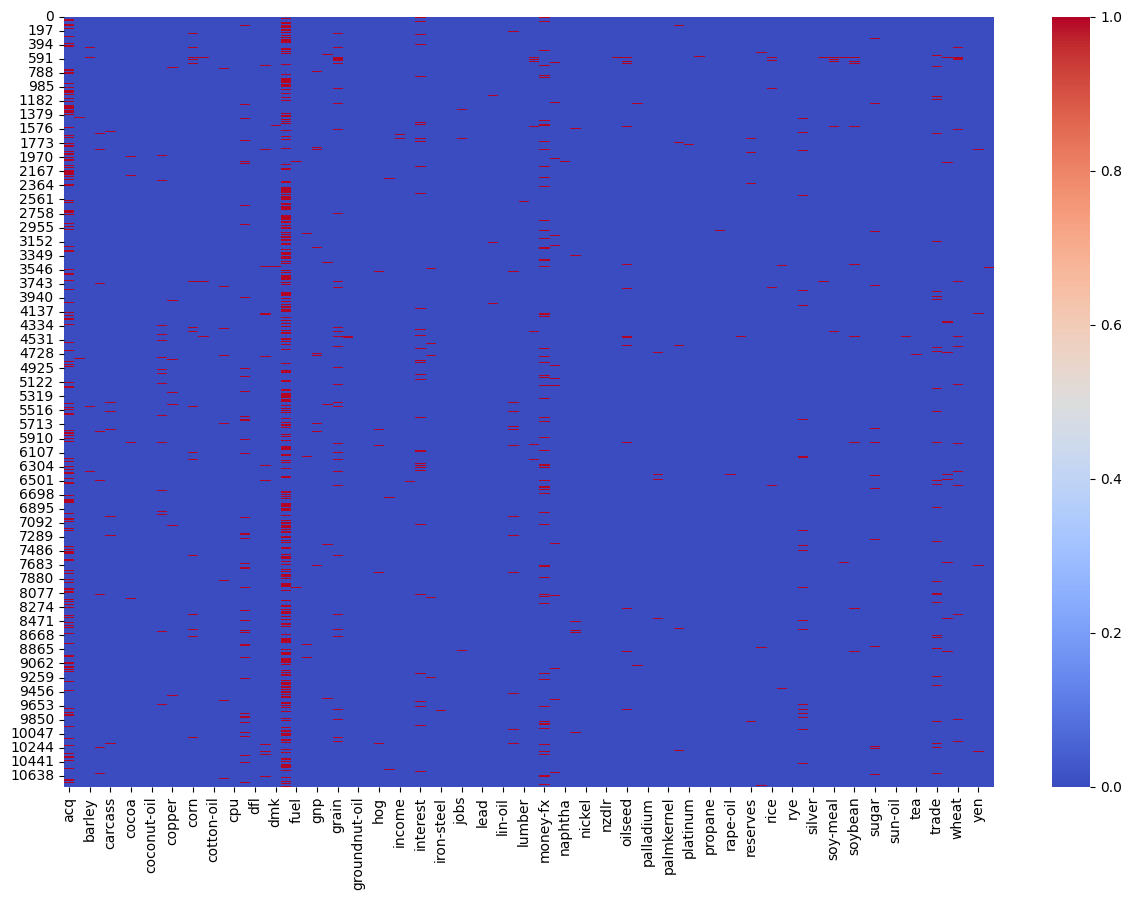

In [9]:
#Heatmap   (patterns and correlations between columns)
plt.figure(figsize=(15, 10))
sns.heatmap(df, cmap='coolwarm', cbar=True)
plt.show()

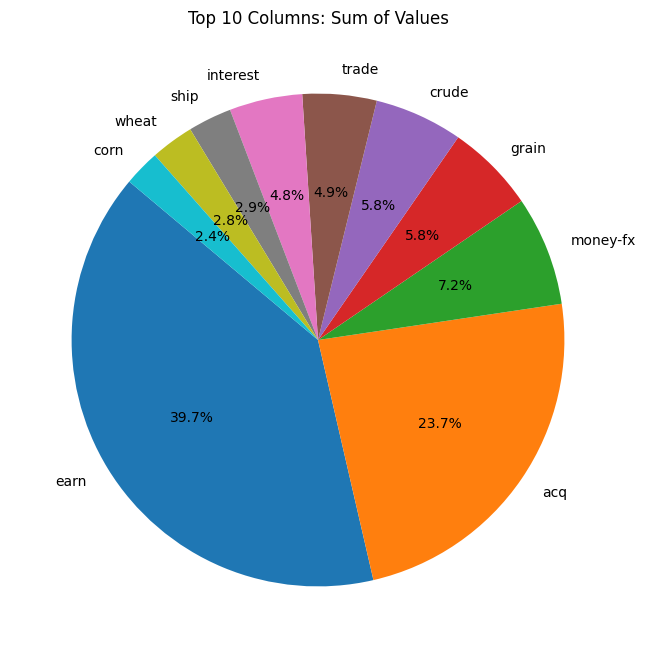

In [11]:
labels = top_10_columns
sizes = [sorted_sums[column] for column in top_10_columns]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Columns: Sum of Values')
plt.show()

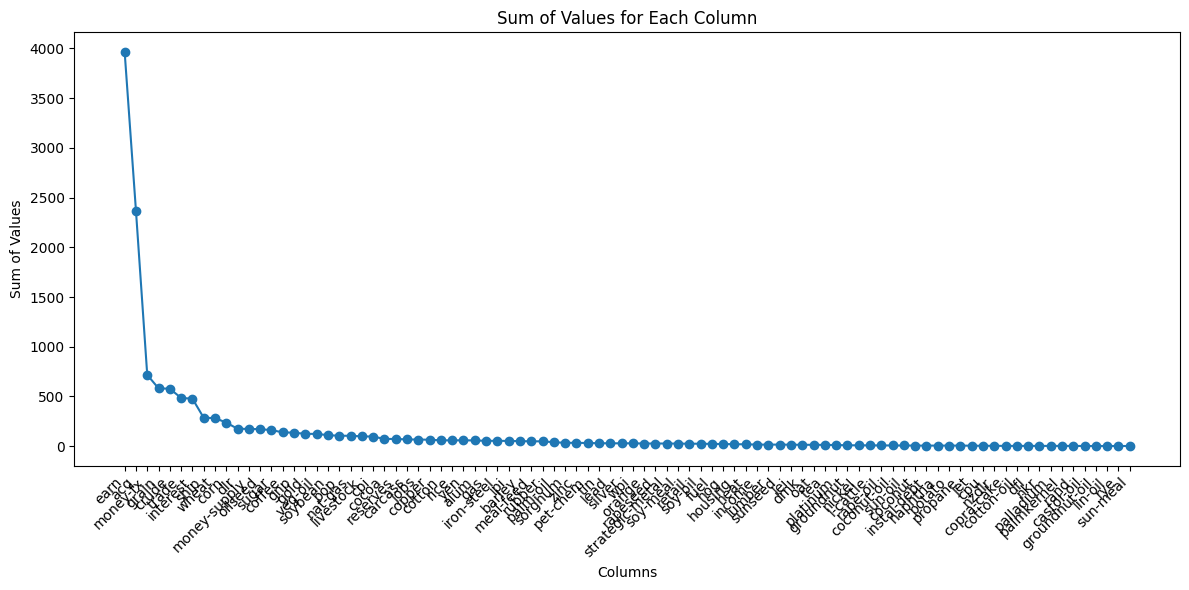

In [13]:
# Plot the line chart

columns = list(sorted_sums.keys())
sums = [sorted_sums[column] for column in columns]

plt.figure(figsize=(12, 6))
plt.plot(columns, sums, marker='o', linestyle='-')
plt.title('Sum of Values for Each Column')
plt.xlabel('Columns')
plt.ylabel('Sum of Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [5]:
#PART 2 => WORDS
#first part was to visualize the topics (categories of datasets and their distribution over documents
#Now We want to show distribution of words 
#=> we will check how many words there are in which document which words are the most represented and similar statistics

#spliting data to test and train
def collection_stats():
    documents = reuters.fileids()
    print(str(len(documents)) + " documents");
 
    train_docs = list(filter(lambda doc: doc.startswith("train"),documents));
    print(str(len(train_docs)) + " total train documents");
 
    test_docs = list(filter(lambda doc: doc.startswith("test"),documents));
    print(str(len(test_docs)) + " total test documents");
 

# Documents in a category
category_docs = reuters.fileids("acq");
 
# Words for a document
document_id = category_docs[0]
document_words = reuters.words(category_docs[0]);
print(document_words);
 
# Raw document
print(reuters.raw(document_id)); #prints words from first document of that category (acq)


['SUMITOMO', 'BANK', 'AIMS', 'AT', 'QUICK', 'RECOVERY', ...]
SUMITOMO BANK AIMS AT QUICK RECOVERY FROM MERGER
  Sumitomo Bank Ltd &lt;SUMI.T> is certain to
  lose its status as Japan's most profitable bank as a result of
  its merger with the Heiwa Sogo Bank, financial analysts said.
      Osaka-based Sumitomo, with desposits of around 23.9
  trillion yen, merged with Heiwa Sogo, a small, struggling bank
  with an estimated 1.29 billion dlrs in unrecoverable loans, in
  October.
      But despite the link-up, Sumitomo President Koh Komatsu
  told Reuters he is confident his bank can quickly regain its
  position.
      "We'll be back in position in first place within three
  years," Komatsu said in an interview.
      He said that while the merger will initially reduce
  Sumitomo's profitability and efficiency, it will vastly expand
  Sumitomo's branch network in the Tokyo metropolitan area where
  it has been relatively weak.
      But financial analysts are divided on whether and how

In [6]:
document_word_count = [(doc_id, len(reuters.words(doc_id))) for doc_id in reuters.fileids()]

# Sort the list based on the number of words in descending order
sorted_document_word_count = sorted(document_word_count, key=lambda x: x[1], reverse=True)

# Print the top 10 documents with the most words
for i, (doc_id, word_count) in enumerate(sorted_document_word_count[:10], 1):
    print(f"{i}. Document ID: {doc_id}, Word Count: {word_count}")

1. Document ID: test/15875, Word Count: 3417
2. Document ID: test/15871, Word Count: 3168
3. Document ID: training/11224, Word Count: 1515
4. Document ID: test/15906, Word Count: 1256
5. Document ID: training/6657, Word Count: 1216
6. Document ID: training/5214, Word Count: 1208
7. Document ID: training/11083, Word Count: 1207
8. Document ID: training/5985, Word Count: 1202
9. Document ID: training/7135, Word Count: 1202
10. Document ID: training/2521, Word Count: 1122


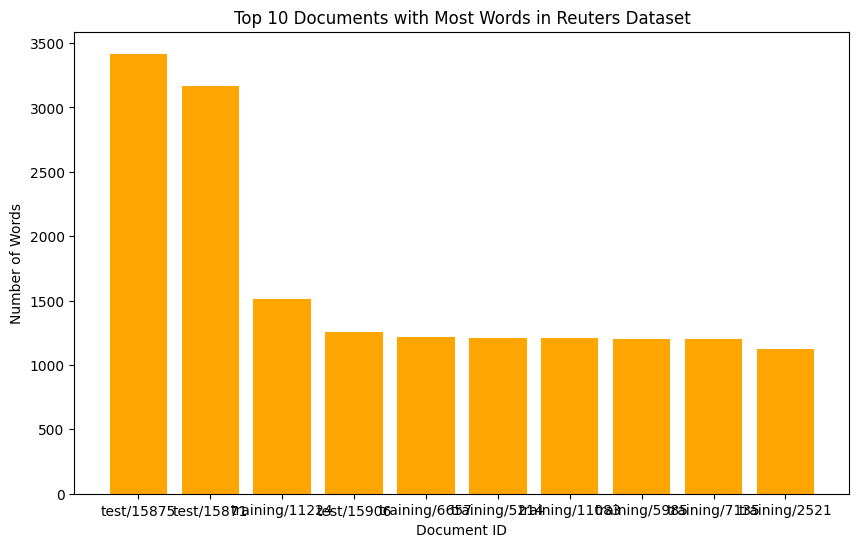

In [8]:
top_10_documents = sorted_document_word_count[:10]
document_ids, word_counts = zip(*top_10_documents)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), word_counts, tick_label=document_ids, color='orange')
plt.xlabel('Document ID')
plt.ylabel('Number of Words')
plt.title('Top 10 Documents with Most Words in Reuters Dataset')
plt.show()

Top 10 most frequent words across all documents:
1. Word: ., Frequency: 94687
2. Word: ,, Frequency: 72360
3. Word: the, Frequency: 58251
4. Word: of, Frequency: 35979
5. Word: to, Frequency: 34035
6. Word: in, Frequency: 26478
7. Word: said, Frequency: 25224
8. Word: and, Frequency: 25043
9. Word: a, Frequency: 23492
10. Word: mln, Frequency: 18037


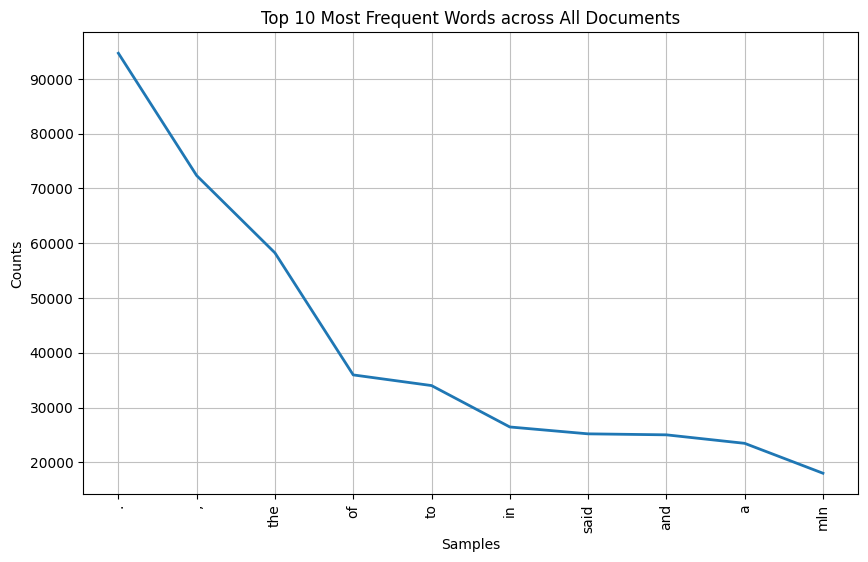

In [9]:
#Most frequent words
from nltk import FreqDist

# Get all words across all documents
all_words = reuters.words()

# Calculate word frequencies
word_freq = FreqDist(all_words)

# Get the top 10 most frequent words
top_10_words = word_freq.most_common(10)

# Print the results
print("Top 10 most frequent words across all documents:")
for i, (word, freq) in enumerate(top_10_words, 1):
    print(f"{i}. Word: {word}, Frequency: {freq}")

# Create a bar chart for visualization
plt.figure(figsize=(10, 6))
word_freq.plot(10, title='Top 10 Most Frequent Words across All Documents')
plt.show()

Top 10 most frequent words across all documents (excluding punctuation):
1. Word: the, Frequency: 69277
2. Word: of, Frequency: 36779
3. Word: to, Frequency: 36400
4. Word: in, Frequency: 29253
5. Word: and, Frequency: 25648
6. Word: said, Frequency: 25383
7. Word: a, Frequency: 25103
8. Word: mln, Frequency: 18623
9. Word: s, Frequency: 15680
10. Word: vs, Frequency: 14341


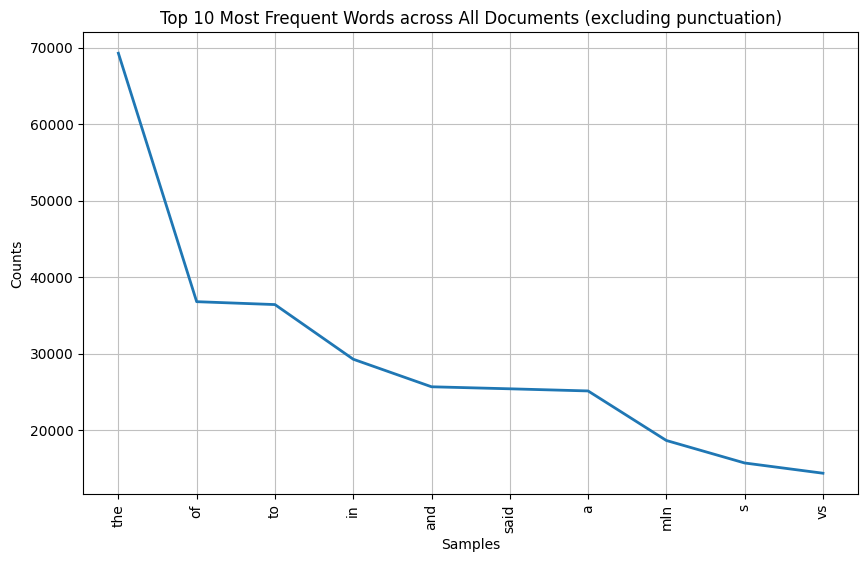

In [22]:
#We see that we have problems with punctiation marks. we have to get rid of them.
import string

# Get all words across all documents, filter out non-alphabetic words
all_words = [word.lower() for word in reuters.words() if word.isalpha()]

# Calculate word frequencies
word_freq = FreqDist(all_words)

# Get the top 10 most frequent words
top_10_words = word_freq.most_common(10)

# Print the results
print("Top 10 most frequent words across all documents (excluding punctuation):")
for i, (word, freq) in enumerate(top_10_words, 1):
    print(f"{i}. Word: {word}, Frequency: {freq}")

# Create a bar chart for visualization
plt.figure(figsize=(10, 6))
word_freq.plot(10, title='Top 10 Most Frequent Words across All Documents (excluding punctuation)')
plt.show()

In [10]:
#10 most frequent words that are not stop words.
from nltk.corpus import stopwords

# Download the stopwords corpus if not already downloaded
nltk.download('stopwords')

# Get the list of stop words
stop_words = set(stopwords.words('english'))

# Get all words across all documents, filter out stop words and non-alphabetic words
all_words = [word.lower() for word in reuters.words() if word.isalpha() and word.lower() not in stop_words]

# Calculate word frequencies
word_freq = FreqDist(all_words)

# Get the top 10 most frequent words
top_10_words = word_freq.most_common(10)

# Print the results
print("Top 10 most frequent words (excluding stop words):")
for i, (word, freq) in enumerate(top_10_words, 1):
    print(f"{i}. Word: {word}, Frequency: {freq}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Korisnik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 most frequent words (excluding stop words):
1. Word: said, Frequency: 25383
2. Word: mln, Frequency: 18623
3. Word: vs, Frequency: 14341
4. Word: dlrs, Frequency: 12417
5. Word: pct, Frequency: 9810
6. Word: lt, Frequency: 8696
7. Word: cts, Frequency: 8361
8. Word: year, Frequency: 7529
9. Word: net, Frequency: 6989
10. Word: u, Frequency: 6392


DRUGI DIO PROJEKTA

In [33]:
"""import nltk
from nltk import FreqDist
from nltk.corpus import reuters
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import random

# Define categories for classification
categories = ['earn', 'acq', 'crude', 'corn']

# Preprocess documents (remove stop words, punctuation...)
def preprocess_document(document):
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in nltk.word_tokenize(document) if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

# Prepare training data
train_data = []

# Set the number of documents to sample from each category
docs_per_category = 380 // len(categories)  # Adjust as needed

for category in categories:
    # Get document IDs for the current category
    doc_ids = reuters.fileids(category)
    
    # Select a balanced number of documents for the current category
    selected_docs = doc_ids[:docs_per_category]
    
    # Add selected documents to the training data
    train_data.extend([(preprocess_document(reuters.raw(doc_id)), category) for doc_id in selected_docs])

test_data = [(preprocess_document(reuters.raw(doc_id)), category) for category in categories for doc_id in reuters.fileids(category)][930:1020]

# Vectorize documents using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform([doc for doc, _ in train_data])
X_test = vectorizer.transform([doc for doc, _ in test_data])

# Train SVM classifier
y_train = [category for _, category in train_data]

# Uncomment the following lines once the syntax error is resolved
clf = SVC(C=1.0, kernel='linear')
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate using F1 score
y_true = [category for _, category in test_data]
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"F1 Score: {f1}")


print(set(y_train))
for doc, category in train_data[:5]:
    print(f"Category: {category}, Document: {doc[:50]}...")"""


'import nltk\nfrom nltk import FreqDist\nfrom nltk.corpus import reuters\nfrom nltk.corpus import stopwords\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.svm import SVC\nfrom sklearn.metrics import f1_score\nimport random\n\n# Define categories for classification\ncategories = [\'earn\', \'acq\', \'crude\', \'corn\']\n\n# Preprocess documents (remove stop words, punctuation...)\ndef preprocess_document(document):\n    stop_words = set(stopwords.words(\'english\'))\n    words = [word.lower() for word in nltk.word_tokenize(document) if word.isalpha() and word.lower() not in stop_words]\n    return \' \'.join(words)\n\n# Prepare training data\ntrain_data = []\n\n# Set the number of documents to sample from each category\ndocs_per_category = 380 // len(categories)  # Adjust as needed\n\nfor category in categories:\n    # Get document IDs for the current category\n    doc_ids = reuters.fileids(category)\n    \n    # Select a balanced number of documents for the 

In [34]:
#Importing libraries
import nltk
from nltk.corpus import reuters
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

#CATEGORIES
categories = ['earn', 'acq', 'crude', 'corn']#list of categories we want to classify

# Preprocess documents (remove stop words, punctuation...) =>Cleaning
def preprocess_document(document):
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in nltk.word_tokenize(document) if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

# Prepare training data
train_data = []

# Set the number of documents to sample from each category
docs_per_category = 380 // len(categories)  # Adjust as needed

# Split the data into training and test sets using ModApte split (ModApte uses train_test_split)
train_set, test_set = [], []
for category in categories:
    doc_ids = reuters.fileids(category)
    train_docs, test_docs = train_test_split(doc_ids, train_size=docs_per_category, random_state=42)
    train_set.extend([(preprocess_document(reuters.raw(doc_id)), category) for doc_id in train_docs])
    test_set.extend([(preprocess_document(reuters.raw(doc_id)), category) for doc_id in test_docs])

# Vectorize documents using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform([doc for doc, _ in train_set])
X_test = vectorizer.transform([doc for doc, _ in test_set])

# Train SVM classifier
y_train = [category for _, category in train_set]
clf = SVC(C=1.0, kernel='linear')
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate using F1 score
y_true = [category for _, category in test_set]
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"F1 Score: {f1}")

F1 Score: 0.9464413980227878


In [ ]:
"""The obtained F1 Score for experiment is 0.9464. This result indicates a high precision and recall in the classification of textual documents
for the selected categories and applied kernels. A high  F1 Score suggests a successful balance between precision (accuracy of positive predictions)
and recall (success in identifying actual positive instances)."""